In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import plotly.tools as tls
import plotly.plotly as py
import cufflinks as cf
# print(cf.__version__)
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

# ------------------------------------------------------------------------
tls.set_credentials_file(username='VIvidh',api_key='5RTkH4bVaeoz7EkYo2ce')
# -------------------------------------------------------------------------

In [2]:
BlackFridayTrain = pd.read_csv('train.csv')

In [3]:
BlackFridayTrain['Product_Category_2'].fillna(0, inplace=True)
BlackFridayTrain['Product_Category_3'].fillna(0, inplace=True)

# BlackFridayTrain['Marital_Status'] = BlackFridayTrain['Marital_Status'].map({0: 'unmarried', 1: 'married'})
# BlackFridayTrain['Product_Category_3'].fillna(0, inplace=True)

BlackFridayTrain['Product_Category_2'] = BlackFridayTrain['Product_Category_2'].astype(int)
BlackFridayTrain['Product_Category_3'] = BlackFridayTrain['Product_Category_3'].astype(int)

In [4]:
BlackFridayTrain.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [5]:
# dummy = pd.get_dummies(BlackFridayTrain['Gender'])
# dummy1 = pd.get_dummies(BlackFridayTrain['City_Category'])
# dummy2 = pd.get_dummies(BlackFridayTrain['Marital_Status'])
# dummy3 = pd.get_dummies(BlackFridayTrain['Occupation'])

In [6]:
# BlackFridayTrain = BlackFridayTrain.drop(['Gender','City_Category', 'Marital_Status', 'Occupation'], axis=1)

In [7]:
# BlackFridayTrain = pd.concat([BlackFridayTrain, dummy, dummy1, dummy2, dummy3], axis = 1)

In [8]:
# BlackFridayTrain['Marital_Status'] = BlackFridayTrain['Marital_Status'].map({'unmarried': 0, 'married': 1})

In [9]:
BlackFridayTrain.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [10]:
BlackFridayTrain.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [11]:
BlackFridayTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null int64
Product_Category_3            550068 non-null int64
Purchase                      550068 non-null int64
dtypes: int64(7), object(5)
memory usage: 50.4+ MB


In [12]:
BlackFridayTrain.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,6.735436,3.841941,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,6.215492,6.250712,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [13]:
BlackFridayTrain.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [14]:
BlackFridayTrain.groupby(['Gender'])['Purchase'].sum().iplot(kind='bar', yTitle='Total Purchase Amount', title='Total Purchase by Gender')

In [15]:
BlackFridayTrain.groupby(['Age'])['Purchase'].sum().iplot(kind='bar', title="Age Distribution of the data")

In [16]:
BlackFridayTrain.groupby(['Occupation'])['Purchase'].sum().iplot(kind='bar', title="Occupation Distribution of the data")

In [17]:
BlackFridayTrain.groupby('City_Category')['Purchase'].sum().iplot(kind='bar', title="City Category Distribution of the data")

In [18]:
BlackFridayTrain.groupby('Stay_In_Current_City_Years')['Purchase'].sum().iplot(kind='bar', title="Stay Duration Distribution of the data")

In [19]:
BlackFridayTrain.groupby('Marital_Status')['Purchase'].sum().iplot(kind='bar', title="Marital Status Distribution of the data")

In [20]:
BlackFridayTrainNew = BlackFridayTrain.copy(deep=True)

BlackFridayTrainNew.loc[BlackFridayTrainNew['Gender'] == 'F', 'Gender'] = 0
BlackFridayTrainNew.loc[BlackFridayTrainNew['Gender'] == 'M', 'Gender'] = 1

BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '0-17', 'Age'] = 0
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '18-25', 'Age'] = 1
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '26-35', 'Age'] = 2
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '36-45', 'Age'] = 3
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '46-50', 'Age'] = 4
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '51-55', 'Age'] = 5
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '55+', 'Age'] = 6

BlackFridayTrainNew.loc[BlackFridayTrainNew['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = 4

BlackFridayTrainNew.loc[BlackFridayTrainNew['City_Category'] == 'A', 'City_Category'] = 0
BlackFridayTrainNew.loc[BlackFridayTrainNew['City_Category'] == 'B', 'City_Category'] = 1
BlackFridayTrainNew.loc[BlackFridayTrainNew['City_Category'] == 'C', 'City_Category'] = 2


BlackFridayTrainNew['Gender'] = BlackFridayTrainNew['Gender'].astype(int)
BlackFridayTrainNew['Age'] = BlackFridayTrainNew['Age'].astype(int)
BlackFridayTrainNew['City_Category'] = BlackFridayTrainNew['City_Category'].astype(int)
BlackFridayTrainNew['Stay_In_Current_City_Years'] = BlackFridayTrainNew['Stay_In_Current_City_Years'].astype(int)

In [21]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969


In [22]:
BlackFridayTrainNew.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [23]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969


In [24]:
ageVsGender = BlackFridayTrainNew.groupby(['Age', 'Gender'])['Purchase'].sum().unstack()

In [25]:
ageVsGender

Gender,0,1
Age,,
0,42385978,92527205
1,205475842,708372833
2,442976233,1588794345
3,243438963,783130921
4,116706864,304136539
5,89465997,277633647
6,45782765,154984610


In [26]:
ageVsGender.iplot(kind='bar', title="Gender Distribution across various Age Groups")

In [27]:
conditions = [
    (BlackFridayTrainNew['Product_Category_1'] != 0) & (BlackFridayTrainNew['Product_Category_2'] == 0) & (BlackFridayTrainNew['Product_Category_3'] == 0),
    (BlackFridayTrainNew['Product_Category_1'] != 0) & (BlackFridayTrainNew['Product_Category_2'] != 0) & (BlackFridayTrainNew['Product_Category_3'] == 0),
    (BlackFridayTrainNew['Product_Category_1'] != 0) & (BlackFridayTrainNew['Product_Category_2'] != 0) & (BlackFridayTrainNew['Product_Category_3'] != 0)]
choices = [1, 2, 3]
BlackFridayTrainNew['Category_Count'] = np.select(conditions, choices, default=0)

In [28]:
BlackFridayTrainNew['Product_Score'] = 0.0
required_product_data = BlackFridayTrainNew[['Product_ID', 'Product_Score']]

required_product_data['Frequency'] = 1

grouped_product_data = required_product_data.groupby(['Product_ID']).sum()
grouped_product_data = grouped_product_data.reset_index()

grouped_product_data.head()

,Product_ID,Product_Score,Frequency
0,P00000142,0.0,1152
1,P00000242,0.0,376
2,P00000342,0.0,244
3,P00000442,0.0,92
4,P00000542,0.0,149


In [29]:
max_frequency = grouped_product_data['Frequency'].max()

final_product_data = grouped_product_data[['Product_ID', 'Product_Score', 'Frequency']]

for index, row in final_product_data.iterrows():
    product_score = (float(row['Frequency']) / float(max_frequency))
    final_product_data.set_value(index, 'Product_Score', product_score)

/Users/suhaniladani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [30]:
final_product_data.head()

,Product_ID,Product_Score,Frequency
0,P00000142,0.612766,1152
1,P00000242,0.200000,376
2,P00000342,0.129787,244
3,P00000442,0.048936,92
4,P00000542,0.079255,149


In [31]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Category_Count,Product_Score
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370,1,0.0
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200,3,0.0
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422,1,0.0
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057,2,0.0
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969,1,0.0


In [32]:
for index, row in BlackFridayTrainNew.iterrows():
    p_score = final_product_data.loc[final_product_data.Product_ID == row['Product_ID'], 'Product_Score'].values[0]
    BlackFridayTrainNew.set_value(index, 'Product_Score', p_score)

/Users/suhaniladani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [33]:
BlackFridayTrainNew['User_Score'] = 0.0
required_user_data = BlackFridayTrainNew[['User_ID', 'User_Score']]

required_user_data['Frequency'] = 1

grouped_user_data = required_user_data.groupby(['User_ID']).sum()
grouped_user_data = grouped_user_data.reset_index()

grouped_user_data.head()

,User_ID,User_Score,Frequency
0,1000001,0.0,35
1,1000002,0.0,77
2,1000003,0.0,29
3,1000004,0.0,14
4,1000005,0.0,106


In [34]:
max_frequency = grouped_user_data['Frequency'].max()

final_user_data = grouped_user_data[['User_ID', 'User_Score', 'Frequency']]

for index, row in final_user_data.iterrows():
    product_score = (float(row['Frequency']) / float(max_frequency))
    final_user_data.set_value(index, 'User_Score', product_score)

/Users/suhaniladani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [35]:
for index, row in BlackFridayTrainNew.iterrows():
    p_score = final_user_data.loc[final_user_data.User_ID == row['User_ID'], 'User_Score'].values[0]
    BlackFridayTrainNew.set_value(index, 'User_Score', p_score)

/Users/suhaniladani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [36]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Category_Count,Product_Score,User_Score
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370,1,0.120745,0.034113
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200,3,0.309043,0.034113
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422,1,0.054255,0.034113
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057,2,0.181383,0.034113
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969,1,0.107979,0.075049


In [37]:
cols = list(BlackFridayTrainNew)
# move the column to head of list using index, pop and insert
cols.insert(14, cols.pop(cols.index('Purchase')))
cols

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Category_Count',
 'Product_Score',
 'User_Score',
 'Purchase']

In [38]:
# use loc to reorder
BlackFridayTrainNew = BlackFridayTrainNew.loc[:, cols]
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Category_Count,Product_Score,User_Score,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,1,0.120745,0.034113,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,3,0.309043,0.034113,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1,0.054255,0.034113,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,2,0.181383,0.034113,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,1,0.107979,0.075049,7969


In [39]:
BlackFridayTrainNew.to_csv('BlackFridayTrainNew.csv')

In [40]:
BlackFridayTrainNew.corr()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Category_Count,Product_Score,User_Score,Purchase
User_ID,1.000000,-0.033474,0.032698,-0.023971,0.022859,-0.030737,0.020443,0.003825,0.003896,0.003605,0.004270,0.003688,-0.032458,0.004716
Gender,-0.033474,1.000000,-0.004262,0.117291,-0.004515,0.014660,-0.011603,-0.045594,-0.000954,0.036146,0.026808,0.020456,0.073517,0.060346
Age,0.032698,-0.004262,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.018770,-0.007422,-0.021246,-0.020741,-0.060446,0.015839
Occupation,-0.023971,0.117291,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,0.006712,0.012269,0.011600,0.011679,-0.002929,0.020833
City_Category,0.022859,-0.004515,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,0.016003,0.035525,0.040739,0.109546,-0.522198,0.061914
Stay_In_Current_City_Years,-0.030737,0.014660,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,0.001262,0.001977,0.002735,0.001470,-0.000280,0.005422
Marital_Status,0.020443,-0.011603,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,0.001099,-0.004629,-0.011257,-0.010415,0.000678,-0.000463
Product_Category_1,0.003825,-0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,-0.067877,-0.385534,-0.518270,-0.205178,0.017748,-0.343703
Product_Category_2,0.003896,-0.000954,0.018770,0.006712,0.016003,0.001262,0.001099,-0.067877,1.000000,0.094750,0.444873,0.098062,-0.027482,0.052288
Product_Category_3,0.003605,0.036146,-0.007422,0.012269,0.035525,0.001977,-0.004629,-0.385534,0.094750,1.000000,0.791044,0.262332,-0.050203,0.288501


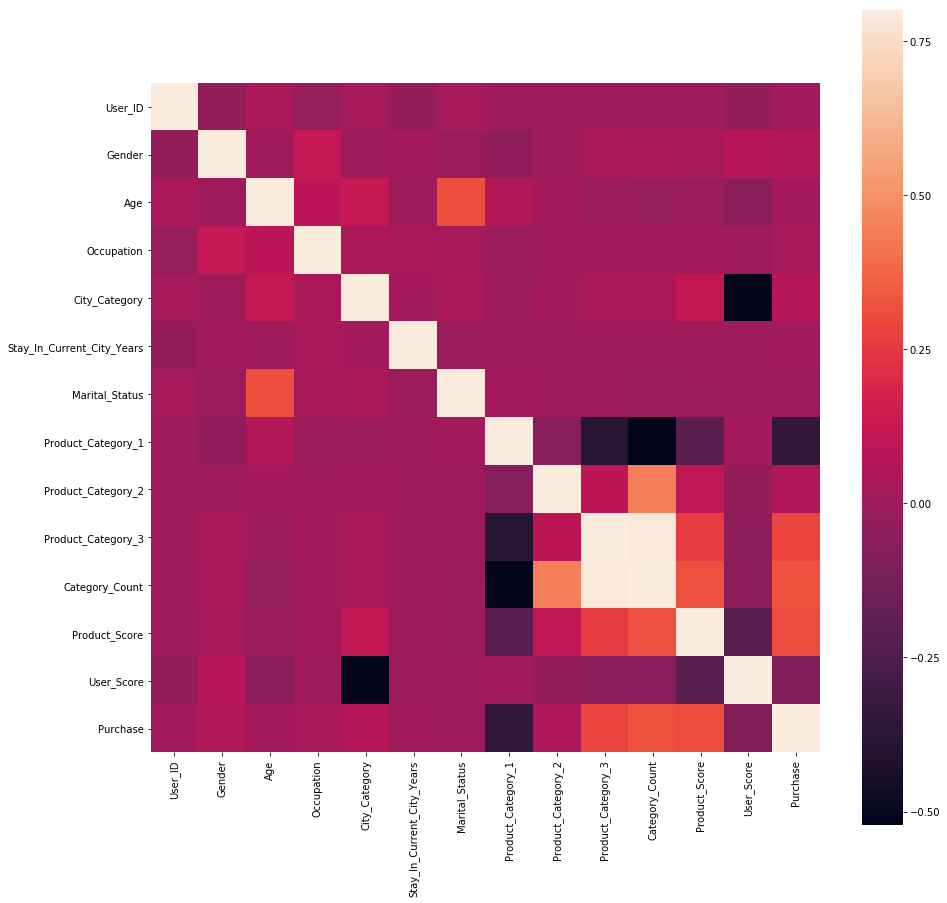

In [41]:
import seaborn as sb
C_mat = BlackFridayTrainNew.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [42]:
BlackFridayTrainNew = pd.read_csv('BlackFridayTrainNew.csv')

In [43]:
X = BlackFridayTrainNew.drop(['Purchase','Product_ID'], axis=1)
y = BlackFridayTrainNew['Purchase']

In [44]:
X.head()

,Unnamed: 0,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Category_Count,Product_Score,User_Score
0,0,1000001,0,0,10,0,2,0,3,0,0,1,0.120745,0.034113
1,1,1000001,0,0,10,0,2,0,1,6,14,3,0.309043,0.034113
2,2,1000001,0,0,10,0,2,0,12,0,0,1,0.054255,0.034113
3,3,1000001,0,0,10,0,2,0,12,14,0,2,0.181383,0.034113
4,4,1000002,1,6,16,2,4,0,8,0,0,1,0.107979,0.075049


In [45]:
X.shape

(550068, 14)

In [46]:
y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

### Testing on Model on Actual Data

In [47]:
BlackFridayTest = pd.read_csv('test.csv')

In [48]:
BlackFridayTest.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [49]:
BlackFridayTest['Product_Category_2'].fillna(0, inplace=True)
BlackFridayTest['Product_Category_3'].fillna(0, inplace=True)

BlackFridayTest['Product_Category_2'] = BlackFridayTest['Product_Category_2'].astype(int)
BlackFridayTest['Product_Category_3'] = BlackFridayTest['Product_Category_3'].astype(int)

In [50]:
# BlackFridayTest['Marital_Status'] = BlackFridayTest['Marital_Status'].map({0: 'unmarried', 1: 'married'})

In [51]:
# dummy = pd.get_dummies(BlackFridayTest['Gender'])
# dummy1 = pd.get_dummies(BlackFridayTest['City_Category'])
# dummy2 = pd.get_dummies(BlackFridayTest['Marital_Status'])
# dummy3 = pd.get_dummies(BlackFridayTest['Occupation'])

In [52]:
# BlackFridayTest = pd.concat([BlackFridayTest, dummy, dummy1, dummy2, dummy3], axis = 1)

In [53]:
# BlackFridayTest['Marital_Status'] = BlackFridayTest['Marital_Status'].map({'unmarried': 0, 'married': 1})

In [54]:
BlackFridayTestNew = BlackFridayTest.copy(deep=True)

BlackFridayTestNew.loc[BlackFridayTestNew['Gender'] == 'F', 'Gender'] = 0
BlackFridayTestNew.loc[BlackFridayTestNew['Gender'] == 'M', 'Gender'] = 1

BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '0-17', 'Age'] = 0
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '18-25', 'Age'] = 1
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '26-35', 'Age'] = 2
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '36-45', 'Age'] = 3
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '46-50', 'Age'] = 4
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '51-55', 'Age'] = 5
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '55+', 'Age'] = 6

BlackFridayTestNew.loc[BlackFridayTestNew['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = 4

BlackFridayTestNew.loc[BlackFridayTestNew['City_Category'] == 'A', 'City_Category'] = 0
BlackFridayTestNew.loc[BlackFridayTestNew['City_Category'] == 'B', 'City_Category'] = 1
BlackFridayTestNew.loc[BlackFridayTestNew['City_Category'] == 'C', 'City_Category'] = 2

BlackFridayTestNew['Gender'] = BlackFridayTestNew['Gender'].astype(int)
BlackFridayTestNew['Age'] = BlackFridayTestNew['Age'].astype(int)
BlackFridayTestNew['City_Category'] = BlackFridayTestNew['City_Category'].astype(int)
BlackFridayTestNew['Stay_In_Current_City_Years'] = BlackFridayTestNew['Stay_In_Current_City_Years'].astype(int)

conditions = [
    (BlackFridayTestNew['Product_Category_1'] != 0) & (BlackFridayTestNew['Product_Category_2'] == 0) & (BlackFridayTestNew['Product_Category_3'] == 0),
    (BlackFridayTestNew['Product_Category_1'] != 0) & (BlackFridayTestNew['Product_Category_2'] != 0) & (BlackFridayTestNew['Product_Category_3'] == 0),
    (BlackFridayTestNew['Product_Category_1'] != 0) & (BlackFridayTestNew['Product_Category_2'] != 0) & (BlackFridayTestNew['Product_Category_3'] != 0)]
choices = [1, 2, 3]
BlackFridayTestNew['Category_Count'] = np.select(conditions, choices, default=0)

In [55]:
BlackFridayTestNew['Product_Score'] = 0.0
required_product_data = BlackFridayTestNew[['Product_ID', 'Product_Score']]

required_product_data['Frequency'] = 1

grouped_product_data = required_product_data.groupby(['Product_ID']).sum()
grouped_product_data = grouped_product_data.reset_index()

grouped_product_data.head()

,Product_ID,Product_Score,Frequency
0,P00000142,0.0,484
1,P00000242,0.0,170
2,P00000342,0.0,105
3,P00000442,0.0,34
4,P00000542,0.0,80


In [56]:
max_frequency = grouped_product_data['Frequency'].max()

final_product_data = grouped_product_data[['Product_ID', 'Product_Score', 'Frequency']]

for index, row in final_product_data.iterrows():
    product_score = (float(row['Frequency']) / float(max_frequency))
    final_product_data.set_value(index, 'Product_Score', product_score)

/Users/suhaniladani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [57]:
for index, row in BlackFridayTestNew.iterrows():
    p_score = final_product_data.loc[final_product_data.Product_ID == row['Product_ID'], 'Product_Score'].values[0]
    BlackFridayTestNew.set_value(index, 'Product_Score', p_score)

/Users/suhaniladani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [58]:
BlackFridayTestNew['User_Score'] = 0.0
required_user_data = BlackFridayTestNew[['User_ID', 'User_Score']]

required_user_data['Frequency'] = 1

grouped_user_data = required_user_data.groupby(['User_ID']).sum()
grouped_user_data = grouped_user_data.reset_index()

grouped_user_data.head()

,User_ID,User_Score,Frequency
0,1000001,0.0,12
1,1000002,0.0,30
2,1000003,0.0,12
3,1000004,0.0,1
4,1000005,0.0,45


In [59]:
max_frequency = grouped_user_data['Frequency'].max()

final_user_data = grouped_user_data[['User_ID', 'User_Score', 'Frequency']]

for index, row in final_user_data.iterrows():
    product_score = (float(row['Frequency']) / float(max_frequency))
    final_user_data.set_value(index, 'User_Score', product_score)

/Users/suhaniladani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [60]:
for index, row in BlackFridayTestNew.iterrows():
    p_score = final_user_data.loc[final_user_data.User_ID == row['User_ID'], 'User_Score'].values[0]
    BlackFridayTestNew.set_value(index, 'User_Score', p_score)

/Users/suhaniladani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [61]:
BlackFridayTestNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Category_Count,Product_Score,User_Score
0,1000004,P00128942,1,4,7,1,2,1,1,11,0,2,0.478890,0.002262
1,1000009,P00113442,1,2,17,2,0,0,3,5,0,2,0.141134,0.061086
2,1000010,P00288442,0,3,1,1,4,1,5,14,0,2,0.090470,0.228507
3,1000010,P00145342,0,3,1,1,4,1,4,9,0,2,0.009650,0.228507
4,1000011,P00053842,0,2,1,2,1,0,4,5,12,3,0.258142,0.090498


In [62]:
BlackFridayTestNew.to_csv('BlackFridayTestNew.csv')

In [63]:
BlackFridayTestNew = pd.read_csv('BlackFridayTestNew.csv')

In [64]:
x_test = BlackFridayTestNew.drop(['Product_ID'], axis=1)

### Ridge

In [65]:
from sklearn.linear_model import Lasso

## training the model
lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(X,y)
predictions = lassoReg.predict(x_test)

finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = predictions

finalsolution.to_csv('finalsolution_Lasso.csv')

### Lasso

In [66]:
from sklearn.linear_model import Ridge

x_test = BlackFridayTestNew.drop(['Product_ID'], axis=1)

## training the model
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X,y)
predictions = ridgeReg.predict(x_test)

finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = predictions

finalsolution.to_csv('finalsolution_Ridge.csv')

### ElasticNet

In [67]:
from sklearn.linear_model import ElasticNet

## training the model
ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
ENreg.fit(X,y)
predictions = ENreg.predict(x_test)

finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = predictions

finalsolution.to_csv('finalsolution_ElasticNet.csv')

In [68]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [69]:
X = BlackFridayTrainNew.drop(['Purchase','Product_ID'], axis=1)
y = BlackFridayTrainNew['Purchase']

In [70]:
lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

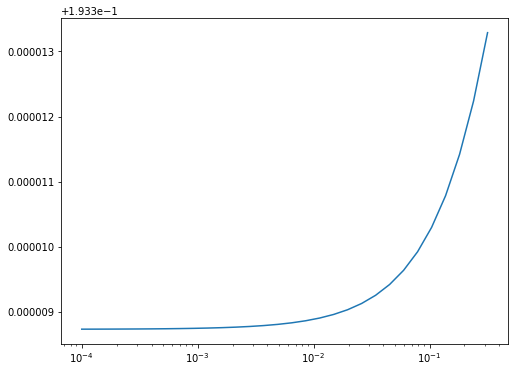

In [71]:
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

(0.0001, 0.31622776601683794)

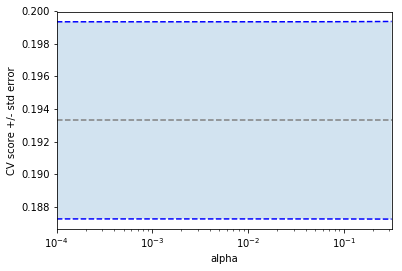

In [72]:
# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

## Linear Regression

In [73]:
from sklearn import linear_model

In [74]:
regr = linear_model.LinearRegression(normalize=True)

In [75]:
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [76]:
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [77]:
BlackFridayTest = pd.read_csv('test.csv')

In [78]:
x_test = BlackFridayTestNew.drop(['Product_ID'], axis=1)

In [79]:
y_pred = regr.predict(x_test)

In [80]:
print(y_pred)

[12032.01770737  9618.10786184  7858.65628075 ... 10308.60442759
  6779.82362646  9273.15331225]


In [81]:
finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = y_pred

In [82]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-3.64127545e-04  1.30435389e-02  4.93752896e+02  1.28755882e+02
  4.96237676e+00  6.42623954e+01  1.17731973e+01 -3.30460078e+01
 -2.85105787e+02 -2.99400313e+01  5.36214307e+01  6.53028141e+02
  5.43790704e+03 -8.94026334e+02]


In [83]:
finalsolution.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,12032.017707
1,1000009,P00113442,9618.107862
2,1000010,P00288442,7858.656281
3,1000010,P00145342,7853.968770
4,1000011,P00053842,10678.120801


In [84]:
finalsolution.count()

User_ID       233599
Product_ID    233599
Purchase      233599
dtype: int64

In [85]:
finalsolution.to_csv('finalsolution_LinearRegression.csv')

### Result - RMSE 4620.something currently
### Best Solution on Leaderboards - RMSE 2405.something

### ExtraTree Regressor

In [117]:
from sklearn.ensemble import ExtraTreesRegressor

In [118]:
eTreeReg = ExtraTreesRegressor(n_estimators=6)

eTreeReg.fit(X,y)

y_pred = eTreeReg.predict(x_test)

In [119]:
finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = y_pred

In [120]:
finalsolution.to_csv('finalsolution_eTreeReg.csv')

In [121]:
eTreeReg

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

### n_estimators = RMSE 10 : 2927.62

## Random Forest

In [122]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor()

In [123]:
# Train the model on training data
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [124]:
X_test = BlackFridayTestNew.drop(['Product_ID'], axis=1)

In [125]:
y_pred = rf.predict(X_test)

In [126]:
print(y_pred)

[13755.875 11838.75   7013.125 ... 10861.5   18198.5    2287.375]


In [127]:
BlackFridayTestNew['User_ID'].shape

(233599,)

In [128]:
finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = y_pred

In [129]:
finalsolution.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,13755.875
1,1000009,P00113442,11838.750
2,1000010,P00288442,7013.125
3,1000010,P00145342,2457.375
4,1000011,P00053842,3054.625


In [130]:
finalsolution.to_csv('finalsolution_RandomForest.csv')

### Result - RMSE 3047.something currently (Random Forest)
### Best Solution on Leaderboards - RMSE 2405.something

## After adding the product score
### Result - RMSE 3010.something currently (Random Forest)
### Best Solution on Leaderboards - RMSE 2405.something
### n_esitmators = 	20 :  RMSE 2914.72
### n estimators = 8 : RMSE	3009.87

In [100]:
import tensorflow as tf

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(X, y, epochs=1, batch_size=16, validation_split = 0.2, callbacks=callbacks_list)

In [ ]:
# Load wights file of the best model :
wights_file = 'Weights-005--3903.65557.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
predictions = NN_model.predict(X_test)

In [ ]:
finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = predictions

In [ ]:
finalsolution.head()

In [ ]:
finalsolution.to_csv('finalsolution_TensorFlow.csv')

## XGBoost

In [101]:
import xgboost

ModuleNotFoundError: No module named 'xgboost'

In [102]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

NameError: name 'xgboost' is not defined

In [ ]:
X.info()

In [ ]:
xgb.fit(X,y)

In [ ]:
x_test = BlackFridayTestNew.drop(['Product_ID'], axis=1)

In [ ]:
predictions = xgb.predict(x_test)

In [ ]:
xgboostsolution = BlackFridayTestNew[['User_ID','Product_ID']]
xgboostsolution['Purchase'] = predictions

In [ ]:
finalsolution.head()

In [ ]:
xgboostsolution.to_csv('finalsolution_XGBoost.csv')

### rmse - 2779.something with 
### rank - 580 among 13000+ participants

In [ ]:
import h2o

# Number of threads, nthreads = -1, means use all cores on your machine
# max_mem_size is the maximum memory (in GB) to allocate to H2O
h2o.init(nthreads = -1, max_mem_size = 8)

In [ ]:
train = h2o.import_file("BlackFridayTrainNew.csv")
test = h2o.import_file("BlackFridayTestNew.csv")

In [ ]:
from h2o.automl import H2OAutoML

In [ ]:
x = train.columns
y = 'Purchase'
x.remove('Purchase')

In [ ]:
x

In [ ]:
aml = H2OAutoML(max_models= 5, seed=1)
aml.train(x=x, y=y, training_frame=train)

In [ ]:
preds = aml.leader.predict(test)

In [ ]:
aml.leader

In [ ]:
aml.leaderboard

In [ ]:
y_pred = preds.as_data_frame()

In [ ]:
y_pred.head()

In [ ]:
finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = y_pred

In [ ]:
finalsolution.to_csv('finalsolution_H2O.csv')

### Rank		498		Score	2662.3541039426	Submission Trend	
